<a href="https://colab.research.google.com/github/SaiDhanyaa/WORK-OUTS/blob/main/ASSIGNMENT_7_CLUSTERING_AIRLINES_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airlineâ€™s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


## ***HIERARCHICAL CLUSTERING***

In [59]:
#IMPRT HIERARCHICAL CLUSTERING LIBRARIES
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [60]:
air=pd.read_csv("/content/EastWestAirlines.csv")

In [61]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [62]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [63]:
# Normalized data frame (considering all the numerical part of data)
df_norm = norm_func(air)

# ***SINGLE LINKAGE METHOD***

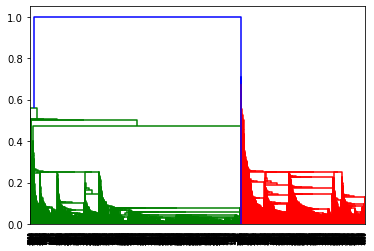

In [64]:
# create dendrogram
dendrogram1 = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [65]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [66]:
# save clusters for chart
y_hc1 = hc1.fit_predict(df_norm)
Clusters1=pd.DataFrame(y_hc1,columns=['Clusters'])

In [67]:
Clusters1

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [68]:
air['h_clusterid'] = Clusters1

In [69]:
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [70]:
air.iloc[:,1:].groupby(air.h_clusterid).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,97010.442568,240.020946,2.662838,1.015541,1.018243,28876.327703,15.735135,837.258108,2.565541,4627.259459,1.0,0
1,59807.839555,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1
2,160114.000000,500.000000,1.000000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.0,2


## ***COMPLETE LINKAGE METHOD***

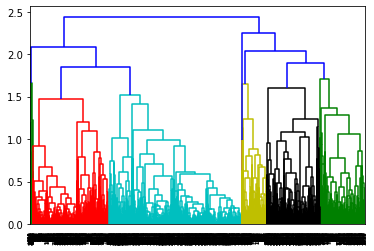

In [71]:
# create dendrogram
dendrogram2 = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [72]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [73]:
# save clusters for chart
y_hc2 = hc2.fit_predict(df_norm)
Clusters2=pd.DataFrame(y_hc2,columns=['Clusters'])

In [74]:
Clusters2

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [75]:
air['h_clusterid'] = Clusters2

In [76]:
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [77]:
air.iloc[:,1:].groupby(air.h_clusterid).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000,0
1,120206.490775,154.529520,4.121771,1.001845,1.044280,51732.154982,20.808118,762.031365,2.302583,5548.643911,1.000000,1
2,65604.537480,196.371611,2.020734,1.009569,1.001595,17800.588517,13.043062,781.886762,2.358852,2943.051037,1.000000,2
3,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714,3
4,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000,4
5,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,5


## ***AVERAGE LINKAGE METHOD***

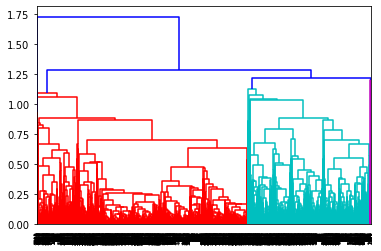

In [78]:
# create dendrogram
dendrogram3 = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [79]:
# create clusters
hc3 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [80]:
# save clusters for chart
y_hc3 = hc3.fit_predict(df_norm)
Clusters3=pd.DataFrame(y_hc3,columns=['Clusters'])

In [81]:
Clusters3

,Clusters
0,2
1,2
2,2
3,2
4,1
...,...
3994,1
3995,1
3996,1
3997,2


In [82]:
air['h_clusterid'] = Clusters3

In [83]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [84]:
air.iloc[:,1:].groupby(air.h_clusterid).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,224089.769231,90.923077,4.307692,1.00000,3.000000,158698.538462,30.615385,1476.384615,4.076923,5954.000000,1.0,0
1,95829.510929,241.230191,2.647541,1.01571,1.000683,27652.528005,15.504781,799.812842,2.459016,4619.886612,1.0,1
2,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,2
3,131999.500000,347.000000,2.500000,1.00000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,3


## ***CENTROID LINKAGE METHOD***

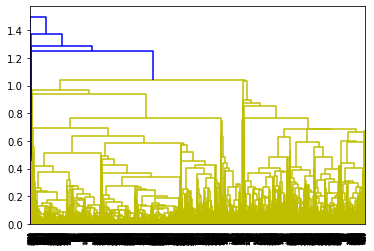

In [85]:
# create dendrogram
dendrogram4 = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [86]:
# create clusters
hc4 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')

In [87]:
# save clusters for chart
y_hc4 = hc4.fit_predict(df_norm)
Clusters4=pd.DataFrame(y_hc4,columns=['Clusters'])

In [88]:
Clusters4

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [89]:
air['h_clusterid'] = Clusters4

In [90]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [91]:
air.iloc[:,1:].groupby(air.h_clusterid).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0,1



## ***Inference :***

# 1.Average flight miles travelled in last 12 month is highest for people in cluster 1

# 2.Cluster 1 has highest average number of transactions in past 12 months

# 3.Award winning average is highest in cluster 11

# 4. people in cluster 1 maintains highner number of miles eligible for the award travel

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
air = pd.read_csv("/content/EastWestAirlines.csv")

In [ ]:
air.head()

In [ ]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air_df = scaler.fit_transform(air)

In [ ]:
scaled_air_df

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## ***WE HAVE CHOSEN THE BEST K VALUE IS 6. AND WE ARE GOING WITH IT***

In [ ]:
# buuild the clusters algorithm
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=6, random_state=42)
kmeans_cluster.fit(scaled_air_df)

In [ ]:
kmeans_cluster.labels_

# ***THESE ARE THE CLUSTER MEMBERS, THAT WE ARE GOING TO APPEND IT IN THE airlines DATASET***

In [ ]:
air['clust6']=kmeans_cluster.labels_

In [ ]:
air.head()

In [ ]:
air.iloc[:,1:].groupby(air.clust6).mean()

## **Inference :**
# 1.Average flight miles travelled in last 12 month is highest for cluster 5

# 2.Cluster 5 has highest average number of transactions in past 12 months

# 3.Award winning average is highest in cluster 5 

# ***WE HAVE CHOSEN THE BEST K VALUE IS 7. AND WE ARE GOING WITH IT***

In [ ]:
# buuild the clusters algorithm
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=7, random_state=42)
kmeans_cluster.fit(scaled_air_df)

In [ ]:
kmeans_cluster.labels_

# ***THESE ARE THE CLUSTER MEMBERS, THAT WE ARE GOING TO APPEND IT IN THE airlines DATASET***

In [ ]:
air['clust7']=kmeans_cluster.labels_

In [ ]:
air.iloc[:,1:].groupby(air.clust7).mean()


## ***Inference :***

# 1.Average flight miles travelled in last 12 month is highest for people in cluster 5

# 2.Cluster 5 has highest average number of transactions in past 12 months

# 3.Award winning average is highest in cluster 5

# 4. people in cluster 5 maintains highner number of miles eligible for the award travel

## ***DBSCAN***